<h2>
<center>
<b>
<i>
Universidad Nacional de Colombia Sede Bogotá
<center>
Análisis Numérico 2021-1
<center>
Tarea computacional Ecuaciones no Lineales


**De La Hoz Luengas, Víctor Andrés** \\
**Matrícula 9 de MATEMÁTICAS**

*A continuación se presentan las librerías necesarias para la solución de los ejercicios, junto con los métodos implementados necesarios. Los métodos usados se tomaron a partir de los presentados en el colab creado por el profesor Juan Galvis.*

### **Librerías**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy import optimize

### **Método de Newton**

In [ ]:
def mynewton(f,fp,x0,myeps,mydel,max_iter):
  '''
  f(x)=0: Método de Newton xn=xk-f(xk)/fp(xk)
  ----------
  f : Función,
  fp : Derivada,
  x0 : Aproximación inicial,
  myeps : Tolerancia residuo,
  mydel : Tolerancia al incremento,
  m : Número máximo de iteraciones
  ---------- 
  '''
  x = x0
  for n in range(1, max_iter):
    fx = f(x)
    if abs(fx) < myeps:
      print('Residuo f(x(',n,'))=', fx, sep='')
      print('x(',n,')=', x, sep='')
      return x
    fpx = fp(x)
    if fpx == 0:
      print('Derivada nula. Error!')
      return None
    x = x - fx/fpx
    print('x(',n,')=',x, sep='')
    if abs(x-x0) < mydel:
      print('Incremento delta(',n,')=',fx, sep='')
      return x
    x0 = x
  print('Número máximo de iteraciones')
  return None

### **Método de la Secante**

In [ ]:
def mysec(f,x0,x1,myeps,mydel,max_iter):
  '''
  ----------
  f : Función,
  fp : Derivada,
  x0 : Aproximación inicial,
  myeps : Tolerancia residuo,
  mydel : Tolerancia al incremento,
  M : Número máximo de iteraciones
  ---------- 
  '''
  x = x0
  for n in range(1,max_iter):
    fx = f(x)
    if abs(fx) < myeps:
      print('Residuo f(x(',n,'))=',fx, sep='')
      print('x(',n,')=',x, sep='')
      return x
    x = x1-f(x1)*((x1-x0)/(f(x1)-f(x0)))
    print('x(',n,')=',x, sep='')
    if abs(x-x0) < mydel:
      print('Incremento delta(',n,')=',fx, sep='')
      return x
    x0 = x1
    x1 = x
  print('Número máximo de iteraciones')
  return None

### **Método de Bisección**

In [ ]:
def bisec(f, a, b, myeps, mydelta, n):
  '''
  ----------
  f : Función,
  a : Límite inferior del intervalo,
  b : Límite superior del intervalo, 
  myeps : Tolerancia residuo,
  mydel : Tolerancia al incremento,
  n : Número de iteraciones requeridas
  ---------- 
  '''
  u = f(a)
  v = f(b)
  e = b - a
  if np.sign(u)!=np.sign(v):
    for k in range(1,n+1):
      e=e/2
      c=a+e
      w=f(c)
      print('x(',k,')=',c, sep='')
      if np.abs(e) < mydelta or np.abs(w) < myeps :
        break
      else:
        if np.sign(w)!=np.sign(u):
          b=c
          v=w
        else:
          a=c
          u=w
  return c

##**Problema 0 (Kelley)** 
Considere el método de Shamanskii de orden $m$ definido de la siguiente manera. Dado $x_n$ calcule $x_{n+1}$ usando $m$ pasos del método de la cuerda, esto es, 

$z_1=x_n-f(x_n)/f'(x_n)$

$z_{j+1}=z_{j}-f(z_j)/f'(x_n),\quad 1\leq j\leq m-1$

$x_{n+1}=z_{m}$.

Observe que se avanza m pasos sin actualiar la derivada en el punto. Implemente el método para un order $m$ definido por el usuario y verifique su código con una ecuación escalar.

###<font color='red'><center><h2><b>*Solución*</font>


**El método**: *El método de Shamanskii, nombrado por su autor (V. E. Shamanskii) fue introducido en el año 1967 en una de sus publicaciones (A modification of Newton's Method). El método básicamente consiste en introducir en el método de Newton, una suseción de pasos del método de cuerda para calcular la siguiente iteración. Cuando se introducen $m$ pasos, se dice que el orden del método es $m$ y además, su convergencia será m-superlineal. En la descripción del método, si se toma $m=1$, es claro que estamos sobre el método de Newton, mientras que si $m\to\infty$ estamos sobre el método de la secante.*

**Estudio de convergencia**: *Se dice que la convergencia de una sucesión es $m$-superlineal a L, es decir, converge más rápido que una lineal, sin llegar a ser una convergencia cuadrática, si:*

$$
\lim_{n\to\infty}\dfrac{||x_{n+1}-L||}{||x_{n}-L||}=0
$$
*donde*
$$
||e_{n+}||\leq K_{s}||e_{n}||^{m+1}
$$

*La demostración de este hecho se obtiene de considerar $K_{s}, \delta > 0$. Tomar un $x_{n}$ en una vecindad de $\delta$ y suponer que sobre $x_{n}$ se tienen las hipótesis del método de Shamanskii. Si esto se tiene, y si la raíz es r, entonces escogiendo $y_{1}=x_{n}$, para todo $1\leq j\leq m$, se tiene que:*

$$
||y_{j}-r||\leq K_{s}||x_{n}-r||\cdot||y_{j-1}-r||=K_{s}||e_{n}||\cdot||y_{j-1}-r||\leq\cdots K_{s}^{j}||e_{n}||^{j+1}
$$

*De manera que tomando $j=m$, se tiene el resultado.*

**Ejemplo**: *Para la implementación del método considere el siguiente código:*

In [ ]:
def misham(f,fp,m,x0,myeps,mydel,max_iter):
  '''
  ----------
  f : Funnción,
  fp : Derivada,
  m : Orden,
  x0 : Aproximación inicial,
  myeps : Tolerancia residuo,
  mydel : Tolerancia al incremento,
  M : Número máximo de iteraciones
  ---------- 
  '''
  if m < 0:
    print('El orden que ingresó no es válido, recuerde que debe ser un entero positivo')
  else:
    x = x0
    for n in range(1, max_iter):
      fx = f(x)
      if abs(fx) < myeps:
        print('Residuo f(x(', n,'))=', fx, sep='')
        print('x(',n,')=', x, sep='')
        return x
      fpx = fp(x)
      if fpx == 0:
        print('Derivada nula. Error!')
        return None
      za = x - f(x)/fp(x)
      for j in range(1, m):
        zb = za - f(za)/fp(x)
        za = zb
      x = zb
      print('x(',n,')=',x, sep='')
      if abs(x-x0) < mydel:
        print('Incremento delta(',n,')=',fx, sep='')
        return x
      x0 = x
    print('Número máximo de iteraciones')
  return None

*Considere la función:*

$$
f(x)=e^{-x}-\sin{x}
$$

*Su gráfica es:*

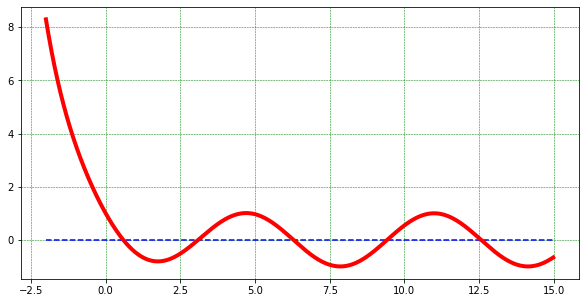

In [ ]:
def mifun(x):
  y=np.exp(-x)-np.sin(x)
  return y
a,b=-2,15
x = np.arange(a, b, (b-a)/1000)
y= mifun(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y*0, 'b--',label='Funcion')
plt.plot(x, y, 'r-',linewidth=4, label='Funcion')
plt.grid(color='g', linestyle='--', linewidth=.5)
plt.show()

*Es claro que:*

$$
f'(x)=-e^{-x}-\cos{x}
$$

*Entonces, implementando el método de Shamanskii, podemos encontrar una raíz cercana al $2$ de la siguiente manera:*

In [ ]:
f = lambda x: np.exp(-x)-np.sin(x)
fp = lambda x: -np.exp(-x)-np.cos(x)
m=int(input('Escoja un orden para el método: '))
sham = misham(f, fp, m, 2, 1e-10, 1e-10, 10)

Escoja un orden para el método: 2
x(1)=1.1678457909476347
x(2)=0.9305195104507752
x(3)=0.6186627146621488
x(4)=0.588542087379775
x(5)=0.5885327439818614
Residuo f(x(6))=-4.440892098500626e-16
x(6)=0.5885327439818614


*Es intersante ver que en esta función en particular, para $m=2$, el método converge a la primera raíz $\alpha_{1}=0.5885327439818614$, mientras que para ordenes superiores, converge para $\alpha_{2}=3.0963639324106462$. $x_{0}=2$ no parece ser una buena elección pues los resultados pretenden mostrar la inestabilidad del método según el orden, sin embargo note que para la primera raíz se necesitan un par de iteraciones más, por lo que este resultado se debe al tipo de convergencia superlineal del orden escogido por el usuario.*

## **Problema 1 (Kelley, Iterative methodos for linear and non linear equations)**
Resuelva las siguientes ecuaiones $f(x)=0$ usando el Método de newton, el método de la secante (para este inicie la iteración en $x_{-1}$ con $x_{-1}=0.99x_0$) y el método de Shamanskii con $m=2,3,4$. Comente los resultados. Puede hacer tablas o plots con las iteraciones.


1.   $x-\cos(x)$,  $\quad x_0=.5$.
2.   $\arctan(x)$,  $\quad x_0=1$.
3.   $\sin(x)$, $\quad  x_0=3$.
4.   $x^2$,  $\quad  x_0=.5$.
5.   $x^2+1$,  $\quad  x_0=10$.

###<font color='red'><center><h2><b>*Solución*</font>

**1.** $x-\cos(x)$,  $\quad x_0=.5$:

*Note que* 

$$
f'(x)=1+\sin{x}
$$

*Entonces, graficando y ejecutando cada uno de los métodos, se tiene:*

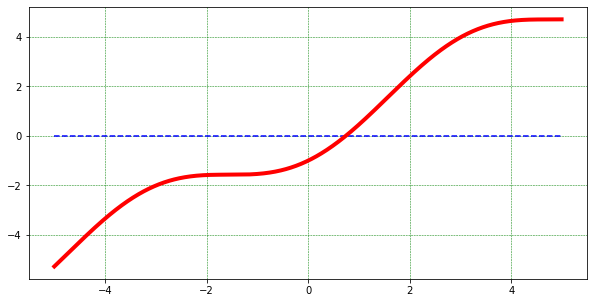

MÉTODO DE NEWTON: 

x(1)=0.7552224171056364
x(2)=0.7391416661498792
x(3)=0.7390851339208068
x(4)=0.7390851332151607
Residuo f(x(5))=0.0
x(5)=0.7390851332151607

 MÉTODO DE LA SECANTE: 

x(1)=0.7556018134618259
x(2)=0.7381069439992566
x(3)=0.7390815947822202
x(4)=0.7390851339798186
x(5)=0.7390851332151601
Residuo f(x(6))=-8.881784197001252e-16
x(6)=0.7390851332151601

 MÉTODO DE SHAMANSKI CON m=2: 

x(1)=0.7369022575908571
x(2)=0.739085132196367
x(3)=0.7390851332151607
Residuo f(x(4))=0.0
x(4)=0.7390851332151607

 MÉTODO DE SHAMANSKI CON m=3: 

x(1)=0.739370462167804
x(2)=0.739085133215161
Residuo f(x(3))=5.551115123125783e-16
x(3)=0.739085133215161

 MÉTODO DE SHAMANSKI CON m=4: 

x(1)=0.7390476611631073
x(2)=0.7390851332151607
Residuo f(x(3))=0.0
x(3)=0.7390851332151607


In [ ]:
def mifun(x):
  y=x-np.cos(x)
  return y
a,b=-5,5
x = np.arange(a, b, (b-a)/1000)
y= mifun(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y*0, 'b--',label='Funcion')
plt.plot(x, y, 'r-',linewidth=4, label='Funcion')
plt.grid(color='g', linestyle='--', linewidth=.5)
plt.show()
f = lambda x: x-np.cos(x)
fp = lambda x: 1+np.sin(x)
x0 = 0.5
print('MÉTODO DE NEWTON: \n')
nton = mynewton(f,fp,x0,1e-10,1e-10,10)
print('\n MÉTODO DE LA SECANTE: \n')
sec = mysec(f,0.99*x0,x0,1e-10,1e-10,10)
print('\n MÉTODO DE SHAMANSKI CON m=2: \n')
sham = misham(f,fp,2,x0,1e-10,1e-10,10)
print('\n MÉTODO DE SHAMANSKI CON m=3: \n')
sham = misham(f,fp,3,x0,1e-10,1e-10,10)
print('\n MÉTODO DE SHAMANSKI CON m=4: \n')
sham = misham(f,fp,4,x0,1e-10,1e-10,10)

*Tanto para Newton como para Secante se tiene un número parecido de iteraciones, esto por la selección de $x_{0}$. Para Shamanskii se observa que se necesitan menos iteraciones y que además, conforme aumenta el orden del método, se gana mayor precisión en menos iteraciones.*

**2.** $\arctan(x)$,  $\quad x_0=1$:

*Note que* 

$$
f'(x)=\dfrac{1}{x^{2}+1}
$$

*Entonces, graficando y ejecutando cada uno de los métodos, se tiene:*

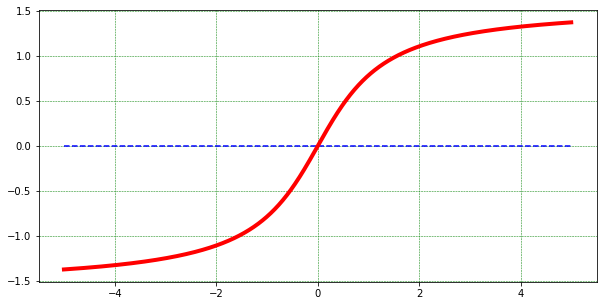

MÉTODO DE NEWTON: 

x(1)=-0.5707963267948966
x(2)=0.1168599039989131
x(3)=-0.001061022117044716
x(4)=7.963096044106416e-10
x(5)=0.0
Residuo f(x(6))=0.0
x(6)=0.0

 MÉTODO DE LA SECANTE: 

x(1)=-0.5629555008204641
x(2)=0.05437899176339167
x(3)=-0.004762797679040566
x(4)=4.279699914119979e-06
x(5)=-3.23313084687194e-11
Residuo f(x(6))=-3.23313084687194e-11
x(6)=-3.23313084687194e-11

 MÉTODO DE SHAMANSKI CON m=2: 

x(1)=0.46654241171513666
x(2)=0.014036315217348203
x(3)=3.632094925656252e-10
x(4)=0.0
Residuo f(x(5))=0.0
x(5)=0.0

 MÉTODO DE SHAMANSKI CON m=3: 

x(1)=-0.4065078298442305
x(2)=0.0011797263030160921
x(3)=-2.1202030620788625e-21
Residuo f(x(4))=-2.1202030620788625e-21
x(4)=-2.1202030620788625e-21

 MÉTODO DE SHAMANSKI CON m=4: 

x(1)=0.3657000806563233
x(2)=7.579381053233038e-05
x(3)=5.50316405494316e-38
Residuo f(x(4))=5.50316405494316e-38
x(4)=5.50316405494316e-38


In [ ]:
def mifun(x):
  y=np.arctan(x)
  return y
a,b=-5,5
x = np.arange(a, b, (b-a)/1000)
y= mifun(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y*0, 'b--',label='Funcion')
plt.plot(x, y, 'r-',linewidth=4, label='Funcion')
plt.grid(color='g', linestyle='--', linewidth=.5)
plt.show()
f = lambda x: np.arctan(x)
fp = lambda x: 1/(1+x**2)
x0 = 1
print('MÉTODO DE NEWTON: \n')
nton = mynewton(f,fp,x0,1e-10,1e-10,10)
print('\n MÉTODO DE LA SECANTE: \n')
sec = mysec(f,0.99*x0,x0,1e-10,1e-10,10)
print('\n MÉTODO DE SHAMANSKI CON m=2: \n')
sham = misham(f,fp,2,x0,1e-10,1e-10,10)
print('\n MÉTODO DE SHAMANSKI CON m=3: \n')
sham = misham(f,fp,3,x0,1e-10,1e-10,10)
print('\n MÉTODO DE SHAMANSKI CON m=4: \n')
sham = misham(f,fp,4,x0,1e-10,1e-10,10)

*Tanto para Newton como para Secante se tiene un número parecido de iteraciones, esto por la selección de $x_{0}$. Para Shamanskii se observa que se necesitan menos iteraciones y que además, conforme aumenta el orden del método, se gana mayor precisión en menos iteraciones. No obstante, por el tamaño de la potencia de 10 a la que llega la raíz en Shamanskii, se sabe que son dígitos sin mayor relevancia, además, la raíz es $x=0$.*

**3.** $\sin(x)$, $\quad  x_0=3$:

*Note que* 

$$
f'(x)=\cos{x}
$$

*Entonces, graficando y ejecutando cada uno de los métodos, se tiene:*

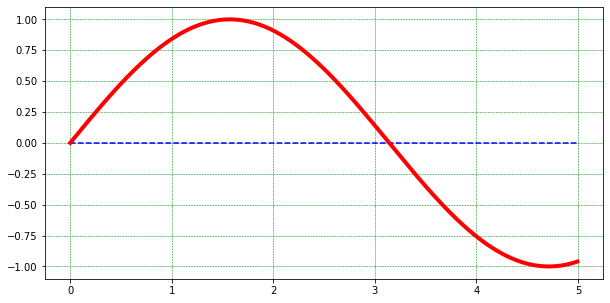

MÉTODO DE NEWTON: 

x(1)=3.142546543074278
x(2)=3.141592653300477
x(3)=3.141592653589793
Residuo f(x(4))=1.2246467991473532e-16
x(4)=3.141592653589793

 MÉTODO DE LA SECANTE: 

x(1)=3.142873441943695
x(2)=3.14158840284594
x(3)=3.1415926535909517
Residuo f(x(4))=-1.1585062838188986e-12
x(4)=3.1415926535909517

 MÉTODO DE SHAMANSKI CON m=2: 

x(1)=3.141583011185802
x(2)=3.141592653589793
Residuo f(x(3))=1.2246467991473532e-16
x(3)=3.141592653589793

 MÉTODO DE SHAMANSKI CON m=3: 

x(1)=3.1415927510616335
x(2)=3.141592653589793
Residuo f(x(3))=1.2246467991473532e-16
x(3)=3.141592653589793

 MÉTODO DE SHAMANSKI CON m=4: 

x(1)=3.141592652604483
x(2)=3.141592653589793
Residuo f(x(3))=1.2246467991473532e-16
x(3)=3.141592653589793


In [ ]:
def mifun(x):
  y=np.sin(x)
  return y
a,b=0,5
x = np.arange(a, b, (b-a)/1000)
y= mifun(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y*0, 'b--',label='Funcion')
plt.plot(x, y, 'r-',linewidth=4, label='Funcion')
plt.grid(color='g', linestyle='--', linewidth=.5)
plt.show()
f = lambda x: np.sin(x)
fp = lambda x: np.cos(x)
x0 = 3
print('MÉTODO DE NEWTON: \n')
nton = mynewton(f,fp,x0,1e-10,1e-10,10)
print('\n MÉTODO DE LA SECANTE: \n')
sec = mysec(f,0.99*x0,x0,1e-10,1e-10,10)
print('\n MÉTODO DE SHAMANSKI CON m=2: \n')
sham = misham(f,fp,2,x0,1e-10,1e-10,10)
print('\n MÉTODO DE SHAMANSKI CON m=3: \n')
sham = misham(f,fp,3,x0,1e-10,1e-10,10)
print('\n MÉTODO DE SHAMANSKI CON m=4: \n')
sham = misham(f,fp,4,x0,1e-10,1e-10,10)

*Tanto para Newton como para Secante se tiene un número parecido de iteraciones, esto por la selección de $x_{0}$. Para Shamanskii se observa que se necesitan menos iteraciones y que además, conforme aumenta el orden del método, se gana mayor precisión en menos iteraciones.*

**4.** $x^2$,  $\quad  x_0=.5$:

*Note que* 

$$
f'(x)=2x
$$

*Entonces, graficando y ejecutando cada uno de los métodos, se tiene:*

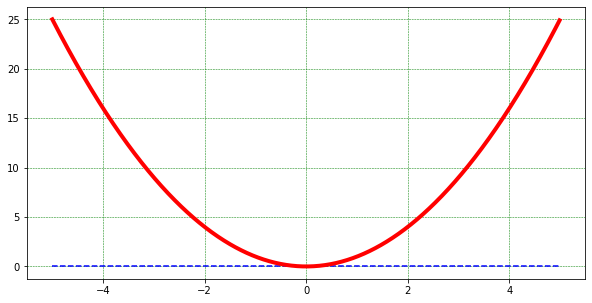

MÉTODO DE NEWTON: 

x(1)=0.25
x(2)=0.125
x(3)=0.0625
x(4)=0.03125
x(5)=0.015625
x(6)=0.0078125
x(7)=0.00390625
x(8)=0.001953125
x(9)=0.0009765625
Número máximo de iteraciones

 MÉTODO DE LA SECANTE: 

x(1)=0.24874371859296496
x(2)=0.16610738255033564
x(3)=0.09959758551307851
x(4)=0.062264150943396254
x(5)=0.038312693498452025
x(6)=0.023718255869669386
x(7)=0.014649304527966858
x(8)=0.00905598243688255
x(9)=0.005596382136800453
Número máximo de iteraciones

 MÉTODO DE SHAMANSKI CON m=2: 

x(1)=0.1875
x(2)=0.0703125
x(3)=0.0263671875
x(4)=0.0098876953125
x(5)=0.0037078857421875
x(6)=0.0013904571533203125
x(7)=0.0005214214324951172
x(8)=0.00019553303718566895
x(9)=7.332488894462585e-05
Número máximo de iteraciones

 MÉTODO DE SHAMANSKI CON m=3: 

x(1)=0.15234375
x(2)=0.046417236328125
x(3)=0.014142751693725586
x(4)=0.0043091196566820145
x(5)=0.0013129348953953013
x(6)=0.00040003485094075586
x(7)=0.00012188561864601155
x(8)=3.7137024431206644e-05
x(9)=1.1315187131383274e-05
Número máximo d

In [ ]:
def mifun(x):
  y=x**2
  return y
a,b=-5,5
x = np.arange(a, b, (b-a)/1000)
y= mifun(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y*0, 'b--',label='Funcion')
plt.plot(x, y, 'r-',linewidth=4, label='Funcion')
plt.grid(color='g', linestyle='--', linewidth=.5)
plt.show()
f = lambda x: x**2
fp = lambda x: 2*x
x0 = 0.5
print('MÉTODO DE NEWTON: \n')
nton = mynewton(f,fp,x0,1e-10,1e-10,10)
print('\n MÉTODO DE LA SECANTE: \n')
sec = mysec(f,0.99*x0,x0,1e-10,1e-10,10)
print('\n MÉTODO DE SHAMANSKI CON m=2: \n')
sham = misham(f,fp,2,x0,1e-10,1e-10,10)
print('\n MÉTODO DE SHAMANSKI CON m=3: \n')
sham = misham(f,fp,3,x0,1e-10,1e-10,10)
print('\n MÉTODO DE SHAMANSKI CON m=4: \n')
sham = misham(f,fp,4,x0,1e-10,1e-10,10)

*Tanto para Newton como para Secante se tiene un número parecido de iteraciones, esto por la selección de $x_{0}$. En este caso no se obtiene tan rápidamente la convergencia como se habría esperado. Para Shamanskii se observa que se necesitan menos iteraciones y que además, conforme aumenta el orden del método, se gana mayor precisión en menos iteraciones.*

**5.** $x^2+1$,  $\quad  x_0=10$:

*Note que* 

$$
f'(x)=2x
$$

*Entonces, graficando y ejecutando cada uno de los métodos, se tiene:*

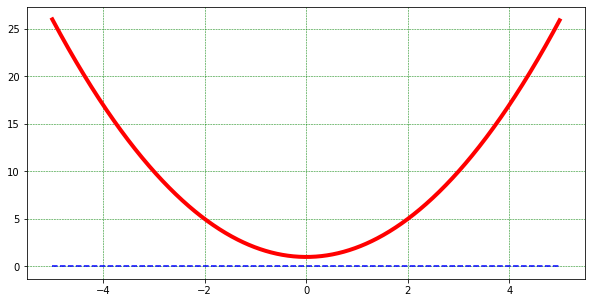

MÉTODO DE NEWTON: 

x(1)=4.95
x(2)=2.3739898989898993
x(3)=0.9763790575685589
x(4)=-0.023906665950920836
x(5)=20.902715447124383
x(6)=10.42743738645265
x(7)=5.165768273437701
x(8)=2.4860931128994133
x(9)=1.041927782013751
Número máximo de iteraciones

 MÉTODO DE LA SECANTE: 

x(1)=4.924623115577894
x(2)=3.232659932659935
x(3)=1.8289952354175814
x(4)=0.9705362083024281
x(5)=0.2768699392622028
x(6)=-0.5862466690446134
x(7)=3.7569537969727858
x(8)=-1.0100275806054695
x(9)=-1.745451670829233
Número máximo de iteraciones

 MÉTODO DE SHAMANSKI CON m=2: 

x(1)=3.674875
x(2)=1.1714708165901153
x(3)=-0.2786719780030029
x(4)=8.362873210784834
x(5)=3.04618163865184
x(6)=0.891685996429961
x(7)=-0.6830298879901185
x(8)=1.234187607197892
x(9)=-0.21135839003293222
Número máximo de iteraciones

 MÉTODO DE SHAMANSKI CON m=3: 

x(1)=2.9496396867187498
x(2)=0.5558608535266893
x(3)=-5.908923559552088
x(4)=-1.6346732525429086
x(5)=0.18511647568361994
x(6)=-1541.8512727702828
x(7)=-469.782181368955
x(8)=-14

In [ ]:
def mifun(x):
  y=x**2+1
  return y
a,b=-5,5
x = np.arange(a, b, (b-a)/1000)
y= mifun(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y*0, 'b--',label='Funcion')
plt.plot(x, y, 'r-',linewidth=4, label='Funcion')
plt.grid(color='g', linestyle='--', linewidth=.5)
plt.show()
f = lambda x: x**2+1
fp = lambda x: 2*x
x0 = 10
print('MÉTODO DE NEWTON: \n')
nton = mynewton(f,fp,x0,1e-10,1e-10,10)
print('\n MÉTODO DE LA SECANTE: \n')
sec = mysec(f,0.99*x0,x0,1e-10,1e-10,10)
print('\n MÉTODO DE SHAMANSKI CON m=2: \n')
sham = misham(f,fp,2,x0,1e-10,1e-10,10)
print('\n MÉTODO DE SHAMANSKI CON m=3: \n')
sham = misham(f,fp,3,x0,1e-10,1e-10,10)
print('\n MÉTODO DE SHAMANSKI CON m=4: \n')
sham = misham(f,fp,4,x0,1e-10,1e-10,10)

*Tanto para Newton como para Secante se tiene un número parecido de iteraciones, esto por la selección de $x_{0}$. En este caso no se obtiene tan rápidamente la convergencia como se habría esperado. Para Shamanskii se observa que el método diverge, también por la selección de $x_{0}$. Esto lleva a pensar sobre la necesidad de iniciar el método, sin importar su orden, en un valor cercano a la raíz para garantizar la convergencia.*

##**Problema 2 (Quarteroni, Saleri, Gervasio)**
Considere un plano cuya pendiente varía con tasa constante $\omega$ y un punto de masa quieto en el tiempo $t=0$. En el tiempo $t>0$ su posición es dada por
$$
s(t,\omega)= \dfrac{g}{2\omega^2}\Big[ \sinh(\omega t)-\sin(\omega t) \Big],
$$

donde $g=9.8 \frac{m}{s^2}$. Suponga que el objeto se ha movido 1 metro en un segundo, calcule el valor correspondiente de $\omega$ con 12 decimales exactos.

###<font color='red'><center><h2><b>*Solución*</font>

*Cuando el objeto se ha movido 1 metro en 1 segundo, tenemos que:*

$$
s(1,\omega)=\dfrac{g}{2\omega^{2}}\left[\sinh(\omega)-\sin(\omega)\right]=1
$$

*Tomando*

$$
f(\omega)=\dfrac{g}{2\omega^{2}}\left[\sinh(\omega)-\sin(\omega)\right]-1
$$

*podemos usar alguno de los métodos estudiados para resolver $f(\omega)=0$. Ahora, para garantizar los 12 decimales exactos, vale la pena escoger un método que permita determinar esta precisión. Resulta ser bisección, el método escogido. Por teorema, sabemos que en el método de bisección, después de n iteraciones:*

$$
||e_{n}||\leq\dfrac{b-a}{2^{n+1}}
$$

*En este caso, tomando $||e||=10^{-13}$, y para poder determinar qué intervalo usar, observemos la gráfica:*

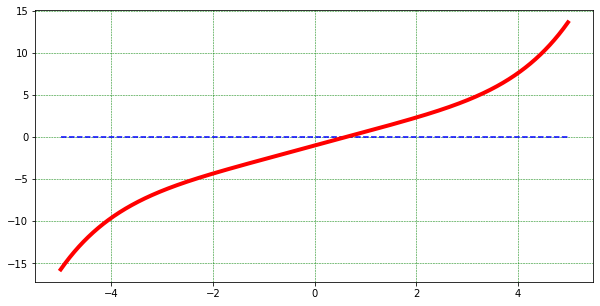

In [ ]:
def mifun(x):
  y=((9.8)/(2*x**2))*(np.sinh(x)-np.sin(x))-1
  return y
a,b=-5,5
x = np.arange(a, b, (b-a)/1000)
y= mifun(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y*0, 'b--',label='Funcion')
plt.plot(x, y, 'r-',linewidth=4, label='Funcion')
plt.grid(color='g', linestyle='--', linewidth=.5)
plt.show()

*Entonces tomando el intervalo $[0.1,1]$, tenemos:*

$$
10^{-13}\leq\dfrac{0.9}{2^{n+1}}
$$

*Solucionando, se tiene $n\geq43$. Entonces, al implementar se obtiene:*

In [ ]:
f = lambda x: ((9.8)/(2*x**2))*(np.sinh(x)-np.sin(x))-1
fp = lambda x: -(9.8/(x**3))*(np.sinh(x)-np.sin(x))+(9.8/(2*x**2))*(np.cosh(x)-np.cos(x))
print('MÉTODO DE BISECCIÓN: \n')
b = bisec(f,0.1,1,1e-16,1e-16,43)

MÉTODO DE BISECCIÓN: 

x(1)=0.55
x(2)=0.775
x(3)=0.6625000000000001
x(4)=0.6062500000000001
x(5)=0.634375
x(6)=0.6203125
x(7)=0.6132812500000001
x(8)=0.6097656250000001
x(9)=0.6115234375
x(10)=0.61240234375
x(11)=0.6119628906250001
x(12)=0.6121826171875001
x(13)=0.61207275390625
x(14)=0.612127685546875
x(15)=0.6121551513671876
x(16)=0.6121414184570313
x(17)=0.6121482849121094
x(18)=0.6121448516845703
x(19)=0.6121431350708009
x(20)=0.6121422767639161
x(21)=0.6121427059173584
x(22)=0.6121424913406373
x(23)=0.6121425986289979
x(24)=0.6121425449848176
x(25)=0.6121425718069077
x(26)=0.6121425583958626
x(27)=0.6121425651013852
x(28)=0.6121425684541465
x(29)=0.6121425701305271
x(30)=0.6121425709687174
x(31)=0.6121425705496223
x(32)=0.6121425707591699
x(33)=0.612142570654396
x(34)=0.6121425707067829
x(35)=0.6121425706805895
x(36)=0.6121425706936863
x(37)=0.6121425707002346
x(38)=0.6121425707035087
x(39)=0.6121425707018717
x(40)=0.6121425707026903
x(41)=0.6121425707030995
x(42)=0.61214257070289

*De manera que:*

$$
\omega\approx0.612142570703
$$

## **Problema 3(Quarteroni, Saleri, Gervasio)** 

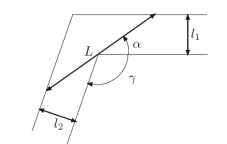

La longitud maxima de una varilla que se puede arrastrar de un extremo a otro deslizandola por un pasillo como el de la fiugra es 
$$
L=\frac{l_2}{\sin(\pi-\gamma-\alpha)}+\frac{l_1}{\sin(\alpha)}
$$
donde $\alpha$ es la solución de la ecuación
$$ 
l_2 \frac{\cos(\pi-\gamma-\alpha)}{\sin^2(\pi-\gamma-\alpha)}-l_1\frac{\cos(\alpha)}{\sin^2(\alpha)}=0.
$$

Calcule $\alpha$ cuando $l_2=10$, $l_1=8$ y $\gamma=\frac{3\pi}{5}$. ¿Cuántos decimales puede garantizar para $\alpha$ y $L$?

###<font color='red'><center><h2><b>*Solución*</font>

*Note que el planteamiento del problema está en términos de $f(\alpha)$, por lo tanto, usando Newton con:*

$$
f(\alpha)=10\frac{\cos(\pi-\frac{3\pi}{5}-\alpha)}{\sin^2(\pi-\frac{3\pi}{5}-\alpha)}-8\frac{\cos(\alpha)}{\sin^2(\alpha)}
$$

*Derivando, se obtiene que:*

$$
f'(\alpha)=8\csc^{3}{\alpha}+8\cot^{2}\alpha\csc{\alpha}+10\sec\left({\alpha-\frac{\pi}{10}}\right)\left(\tan^{2}\left({\alpha-\frac{\pi}{10}}\right)+\sec^{2}\left({\alpha-\frac{\pi}{10}}\right)\right)
$$

*Antes de implementar el método, resulta valioso graficar para tener un mejor criterio sobre la selección de $x_{0}$:*

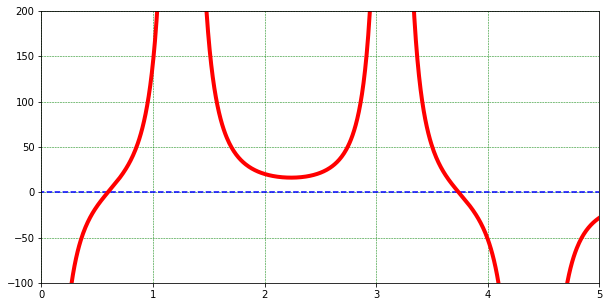

In [ ]:
def mifun(a):
  y = 10*(np.cos(np.pi-(3*np.pi/5)-a)/(np.sin(np.pi-(3*np.pi/5)-a))**2)-8*np.cos(a)/np.sin(a)**2
  return y
a,b = -2, 5
x = np.arange(a, b, (b-a)/1000)
y= mifun(x)
plt.figure(figsize=(10, 5))
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlim(0,5)
plt.ylim(-100, 200)
plt.plot(x, y*0, 'b--',label='Funcion')
plt.plot(x, y, 'r-',linewidth=4, label='Funcion')
plt.grid(color='g', linestyle='--', linewidth=.5)
plt.show()

*Ahora, implementando Newton, obtenemos un valor aproximado para $\alpha$, si iniciamos en $x_{0}=0.5$:*

In [ ]:
f = lambda a: 10*(np.cos(np.pi-(3*np.pi/5)-a)/(np.sin(np.pi-(3*np.pi/5)-a))**2)-8*np.cos(a)/np.sin(a)**2
fp = lambda a: 8*(1/np.sin(a))**3+8*((1/np.tan(a))**2)*(1/np.sin(a))+10*(1/np.cos(a-np.pi/10))*(np.tan(a-np.pi/10)**2+(1/np.cos(a-np.pi/10))**2)
x0 = 0.6
print('MÉTODO DE NEWTON: \n')
maxf = mynewton(f,fp,x0,1e-10,1e-10,50)

MÉTODO DE NEWTON: 

x(1)=0.5937376374902518
x(2)=0.5979146846467931
x(3)=0.595184859211708
x(4)=0.5969942241071262
x(5)=0.5958056908635476
x(6)=0.5965911547980524
x(7)=0.596074105605502
x(8)=0.5964153573290717
x(9)=0.5961905178626591
x(10)=0.5963388255296392
x(11)=0.5962410724968268
x(12)=0.5963055355911265
x(13)=0.5962630393080184
x(14)=0.5962910603223374
x(15)=0.5962725865579248
x(16)=0.5962847671224522
x(17)=0.5962767364343712
x(18)=0.5962820313090882
x(19)=0.5962785403318007
x(20)=0.5962808420174183
x(21)=0.5962793244781296
x(22)=0.5962803250244681
x(23)=0.5962796653460455
x(24)=0.5962801002854904
x(25)=0.5962798135216684
x(26)=0.5962800025907664
x(27)=0.596279877933864
x(28)=0.5962799601226153
x(29)=0.5962799059339751
x(30)=0.596279941661608
x(31)=0.5962799181056833
x(32)=0.5962799336365654
x(33)=0.5962799233967518
x(34)=0.5962799301480611
x(35)=0.5962799256967909
x(36)=0.5962799286316005
x(37)=0.5962799266966231
x(38)=0.5962799279723916
x(39)=0.5962799271312524
x(40)=0.5962799276

*Entonces:*

$$
\alpha\approx 0.596279927
$$

*Y por la convergencia del método de Newton, con este número de iteraciones se están garantizando 9 dígitos.*

##**Problema 4 (Quarteroni, Saleri, Gervasio)**
Note que $f(x)=e^x-2x^2$ tiene 3 raíces, $\alpha_1<0$, y $\alpha_{2},\alpha_{3}>0$. ¿Para cuales valores de $x_0$ el método de Newton converge a $\alpha_1$?.

###<font color='red'><center><h2><b>*Solución*</font>

*En primer lugar, veamos la gráfica de $f(x)$:*

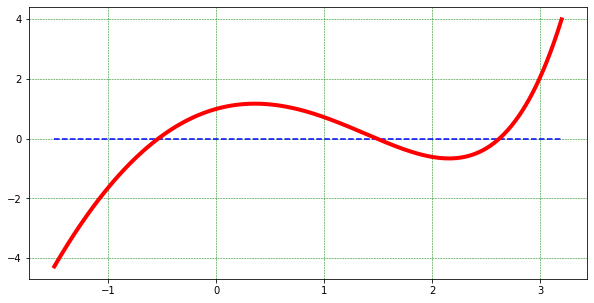

In [ ]:
def mifun(x):
  y = np.exp(x)-2*x**2
  return y
a,b=-1.5,3.2
x = np.arange(a, b, (b-a)/1000)
y= mifun(x)
plt.figure(figsize=(10, 5))
plt.plot(x, y*0, 'b--',label='Funcion')
plt.plot(x, y, 'r-',linewidth=4, label='Funcion')
plt.grid(color='g', linestyle='--', linewidth=.5)
plt.show()

*Ahora, como la convergencia del método de Newton depende de la interesección de la tangente en el eje $x$, es necesario conocer los valores críticos de $f$, pues estos determinan la dirección que tendrá la recta tangente en un determinado punto. Es claro que:*

$$
f'(x)=e^{x}-4x
$$

*También:*

$$
f''(x)=e^{x}-4
$$

*Entonces, implementando Newton para la derivada de $f$, se tiene:*

In [ ]:
f = lambda x: np.exp(x)-4*x
fp = lambda x: np.exp(x)-4
x0=1
print('MÁXIMO DE f: \n')
maxf = mynewton(f,fp,x0,1e-10,1e-10,20)
x0=4
print('\nMÍNIMO DE f: \n', sep='')
minf = mynewton(f,fp,x0,1e-10,1e-10,20)

MÁXIMO DE f: 

x(1)=0.0
x(2)=0.3333333333333333
x(3)=0.35724647604398185
x(4)=0.3574029493733072
x(5)=0.3574029561813889
Residuo f(x(6))=0.0
x(6)=0.3574029561813889

MÍNIMO DE f: 

x(1)=3.2371628210149863
x(2)=2.6541281326944426
x(3)=2.3020062000952546
x(4)=2.1708483685048665
x(5)=2.1535741652642026
x(6)=2.153292438219569
x(7)=2.1532923641103547
Residuo f(x(8))=2.3092638912203256e-14
x(8)=2.1532923641103547


*Seleccionando adecuadamente $x_{0}$, se obtiene que la función tiene máximo en* 

$$
x_{max}\approx 0.3574029561813889
$$ 

*y* 

$$
x_{min}\approx 2.153292364110354
$$

*Es claro que para todo $x < x_{max}$, el método converge para $\alpha_{1}$. Ahora, note que cerca de $x_{min}^{-}$, la tangente en algunos puntos, intersecta al eje x antes de $x_{max}$, por lo que a partir de la segunda iteración, también convergen a $\alpha_{1}$, es decir, se tiene un intervalo $(a,x_{min})$. Para poder encontrar este $a$, resolvemos la siguiente ecuación:*

$$
\dfrac{e^{a}-2a^{2}}{a-x_{max}}=e^{a}-4a
$$

*Ahora, usando Newton podemos resolver g(a)=0, con*

$$
g(a)=\dfrac{e^{a}-2a^{2}}{a-x_{max}}-e^{a}+4a
$$

*cuya derivada es:*

$$
g'(a)=\dfrac{2a^{2}-e^{a}}{(a-x_{max})^{2}}+\dfrac{e^{a}-4a}{a-x_{max}}-e^{a}+4
$$

*Por lo tanto implementando Newton para esta función:*

In [ ]:
xmax = 0.3574029561813889
g = lambda a: ((np.exp(a)-2*a**2)/(a-xmax))-np.exp(a)+4*a
gp = lambda a: (2*a**2-np.exp(a))/((a-xmax)**2)+(np.exp(a)-4*a)/(a-xmax)-np.exp(a)+4
a = mynewton(g,gp,3,1e-10,1e-10,20)

x(1)=2.4524114812954347
x(2)=2.1515876602298465
x(3)=2.0697074730636142
x(4)=2.0645200086415163
x(5)=2.064500482230834
x(6)=2.0645004819553967
Residuo f(x(7))=-1.7763568394002505e-15
x(7)=2.0645004819553967


*Es decir que con $f$, Newton converge a $\alpha_{1}$ para*

$$
x\in(-\infty,x_{max})\cup(a,x_{min})
$$

*con:*

$$
x_{max}\approx 0.3574029561813889
$$
$$
x_{min}\approx 2.153292364110354
$$
$$
a\approx 2.0645004819553967
$$

*Puede verificar con el siguiente código en el que puede cambiar $x_{0}$*:

In [ ]:
f = lambda x: np.exp(x)-2*x**2
fp = lambda x: np.exp(x)-4*x
print('MÉTODO DE NEWTON: \n')
x0=2.07
approx = mynewton(f,fp,x0,1e-10,1e-10,20)

MÉTODO DE NEWTON: 

x(1)=0.2540685175078723
x(2)=-3.9958132549332097
x(3)=-2.001352457167264
x(4)=-1.0338921331858115
x(5)=-0.6370604985182495
x(6)=-0.5451399560786682
x(7)=-0.5398527051970603
x(8)=-0.5398352770920715
x(9)=-0.5398352769028201
Residuo f(x(10))=0.0
x(10)=-0.5398352769028201


##**Problema 5**
Selecciones dos de los métodos en https://docs.scipy.org/doc/scipy-0.13.0/reference/optimize.html en la sección Root finding, diga cual es el método numerico implementado (e.g, similar a newton, usa derivadas, no usa derivadas, combina varios métodos, llama alguna otra subrutina conocida encontrada en netlib, cuales son las toleracias por defecto, etc)  y para cada uno de los métodos seleccionados implementar un ejemplo numérico con una ecuación escalar o una ecuación vectorial según sea el caso. Imprima la solución calculada asi como alguna informacion adicional (residuo, cantidad de iteraciones, etc). 

Si usa MatLab seleccione dos de entre los métodos como fsolve, froot, fzero, roots, o similares (https://la.mathworks.com/help/optim/systems-of-nonlinear-equations.html). Análogamente para octave (https://octave.org/doc/v4.2.0/Solvers.html), julia, etc.

<font color='red'><b><center><h2>*Solución*</font>

**scipy.optimize.ridder**

*Encuentra la raíz de una función usando el método de Ridder*


**El método:** 

*El método de Ridder se basa en el método de Regula Falsi, o falsa posición, para luego usar una función exponencial que sucesivamente se aproximará a la raíz de la función. Específicamente se sigue el siguiente algoritmo:*

*Dada una función $f$:*

1. *Se introducen dos valores $x_{0}$, $x_{2}$ tales que $f(x_{0})f(x_{2})< 0$*.

2. *Se evalúa el punto medio $x_{1}=\dfrac{x_{0}+x_{2}}{2}$*.

3. *Se encuentra una función exponencial $e^{ax}$ tal que $h(x)=f(x)e^{ax}$ satisface $h(x_{1})=\dfrac{h(x_{0})+h(x_{2})}{2}$. Para esto, determina $a$, usando:*

$$
e^{a(x_{1}-x_{0})}=\dfrac{f(x_{1})-\text{sign}[f(x_{0})]\sqrt{f(x_{1})^{2}-f(x_{0})f(x_{2})}}{f(x_{2})}
$$

4. *Se aplica Regula Falsi a $(x_{0},h(x_{0}))$, $(x_{2},h(x_{2})$ para obtener la siguiente iteración:*

$$
x_{3}=x_{1}+(x_{1}-x_{0})\dfrac{\text{sign}[f(x_{0})]f(x_{1})}{\sqrt{f(x_{1})^{2}-f(x_{0})f(x_{2})}}
$$

**Los parámetros:**

*(f, a, b, args=(), xtol, rtol, maxiter, full_output, disp)*

* **f** *es la función a la que se le desea calcular la ráiz.*
* **a** *es el extremo izquierdo del intervalo escogido.*
* **args** *son argumentos extras de la función.*
* **b** *es el extremo derecho del intervalo escogido.*
* **xtol** *es la tolerancia escogida de escala. Su valor por defecto es $2\times10^{-12}$*.
* **rtol** *es la tolerancia de proximidad a la raíz. Su valor por defecto es $8.881784197001252\times10^{-16}$*.
* **maxiter** *es el número máximo de iteraciones. Su valor por defecto es $100$*.
* **full_output** *permite ver los resultados de ejecutar el método, además de la raíz. Por ejemplo, si se obtuvo o no convergencia, en cuántas iteraciones y demás. Su valor por defecto es $\text{False}$.*
* **disp** *registra el tipo de convgergencia obtenida. Su valor por defecto es $\text{True}$*.

**Ejemplo**

*A continuación se presenta un ejemplo con una de las funciones que se usaron para la solución del problema $3$:*


In [ ]:
def f(a):
    return 10*(np.cos(np.pi-(3*np.pi/5)-a)/(np.sin(np.pi-(3*np.pi/5)-a))**2)-8*np.cos(a)/np.sin(a)**2
optimize.ridder(f, -1, 2, (), 2e-12, 8.881784197001252e-16, 100, full_output=True, disp=True)

(0.5962799274664735,       converged: True
            flag: 'converged'
  function_calls: 16
      iterations: 7
            root: 0.5962799274664735)

**scipy.optimize.newton_krylov**

*Encuentra la raíz de una función, usando la aproximación de Krylov para la inversa del Jacobiano.*

**El método**

*Cuando el método de Newton se implementa para funciones de varias variables, es necesario calcular la inversa del Jacobiano y una de las formas de calcular esta inversa es usando el método del mínimo residuo generalizado, y este se basa en un subespacio de Krylov. El subespacio de Kyrlov de orden $n$ se define como:*

$$
\mathcal{K}_{n}(A,x)=\text{gen}\{x, Ax, A^{2}x,\dots, A^{n-1}x\}
$$

*y el método de residuo generalizado, se encarga de aproximar la solución de $Ax=b$ minimizando en norma Euclídea, el residuo $r_{n}=Ax_{n}-b$ para algún $x_{n}$ en el subespacio de Krylov asociado.*

**Los parámetros:**

*(F, xin, iter, rdiff, method, inner_maxiter, inner_M, outer_k, verbose, maxiter, f_tol, f_rtol, x_tol, x_rtol, tol_norm, line_search, callback,**kw)*

* **F** *es la función a la cual se le quiere calcular la raíz.*
* **xin** *es el valor de inicio.*
* **iter** *es el número de iteraciones a realizar. No tiene valor por defecto.*
* **rdiff** *es el parámetro de escala al usar diferenciación numérica. No tiene valor por defecto.*
* **method** *es el tipo de método de Krylov que se usa, pueden ser {‘lgmres’, ‘gmres’, ‘bicgstab’, ‘cgs’, ‘minres’}. Su valor por defecto es lgmres.*
* **inner_maxiter** *es el número de iteraciones para calcular la itearción de Krylov. Su valor por defecto es 20*
* **inner_M** *es la condición inicial del método de Krylov. No tiene valor por defecto.*
* **outer_k** *es el orden del subespacio de Krylove. Su valor por defecto es 10.*
* **verbose** *permite ver cada iteración del método. Su valor por defecto es $\text{False}$.*
* **maxiter** *es el número máximo de iteraciones. No tiene valor por defecto.*
* **f_tol** *es la tolerancia de precisión absoluta para el residuo. Su valor por defecto es $6\times10^{-6}$.*
* **f_rtol** *es la tolerancia de precisión relativa para el residuo. No tiene valor por defecto.*
* **x_tol** *es la tolerancia absoluta de escala. No tiene valor por defecto.*
* **x_rtol** *es la tolerancia relativa de escala. No tiene valor por defecto.*
* **tol_norm** *es la norma que se usa para verificar la convergencia. Su valor por defecto es la norma del supremo.*
* **line_search** *es el tipo de busquéda para la dirección de aproximación del Jacobiano, puede ser {None, ‘armijo’ (default), ‘wolfe’}. Su valor por defecto es 'armijo'.*
* **callback** *determina si hay o no 'callback' en el método. Permite ver el valor aproximado y el residuo. No tiene valor por defecto.*
* **kw** *es un objeto sobre el que se puede escribir, tipo mapping.*

*A continuación se presenta un ejemplo propuesto con una funcion de varias varibles:*

In [ ]:
def f(x):
    return [x[0] + 0.5*x[1] - 1.0,
            0.5*(x[1] - x[0])**(3)]
optimize.newton_krylov(f, [0,0], iter=None, rdiff=None, method='lgmres', inner_maxiter=20, inner_M=None, outer_k=10, verbose=True, maxiter=None, f_tol=None, f_rtol=None, x_tol=None, x_rtol=None, tol_norm=None, line_search='armijo', callback=None,**{})

0:  |F(x)| = 0.5; step 1
1:  |F(x)| = 0.148148; step 1
2:  |F(x)| = 0.0438958; step 1
3:  |F(x)| = 0.0130061; step 1
4:  |F(x)| = 0.00385367; step 1
5:  |F(x)| = 0.00114183; step 1
6:  |F(x)| = 0.00033832; step 1
7:  |F(x)| = 0.000100243; step 1
8:  |F(x)| = 2.97016e-05; step 1
9:  |F(x)| = 8.80049e-06; step 1
10:  |F(x)| = 2.60756e-06; step 1


array([0.67244718, 0.65510563])

## **Referencias**
* Kelley, C. T. (1995). Iterative methods for linear and nonlinear equations. Society for Industrial and Applied Mathematics.
* Brent, R. (1973). Some Efficient Algorithms for Solving Systems of Nonlinear Equations. SIAM Journal on Numerical Analysis, 10(2), 327-344. Retrieved April 16, 2021, from http://www.jstor.org/stable/2156360
* Quarteroni, A., Saleri, F., & Gervasio, P. (2006). Scientific computing with MATLAB and Octave (Vol. 2). Berlin: Springer.
* C. Ridders, "A new algorithm for computing a single root of a real continuous function," in IEEE Transactions on Circuits and Systems, vol. 26, no. 11, pp. 979-980, November 1979, doi: 10.1109/TCS.1979.1084580.
* Kelley, C. T. (2003). Solving nonlinear equations with Newton's method. Society for Industrial and Applied Mathematics.

